# Matemática para Ciencia de los Datos
# Trabajo Práctico 3

Profesor: Juan Luis Crespo Mariño (basado en trabajo previo de Luis Alexánder Calvo Valverde)

Instituto Tecnológico de Costa Rica,

Programa Ciencia de Datos

---

Fecha de entrega:  5 de Noviembre de 2024, a más tardar a las 6:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ).

Estudiante(s):
1. Jonathan Chavarria
1. Felipe Quesada


---

**Pregunta 1**



Se puede demostrar que para los vectores generadores de un subespacio $E=\textrm{espacioGenerado}\left\{ \vec{v}_{1},\vec{v}_{2},\ldots,\vec{v}_{m}\right\}$ , con $V=\left[\vec{v}_{1},\vec{v}_{2},\ldots,\vec{v}_{m}\right]$,con $\vec{v}_{m}\in\mathbb{R}^{n}$ si son ortonormales, la ecuación de la proyección de un vector $\vec{u}\in\mathbb{R}^{n}$ originalmente dada por:

$$\textrm{proy}\left(\vec{u};V\right)=\textrm{argmin}_{\vec{v}\in E}\left\Vert \vec{v}-\vec{u}\right\Vert _{2}=V\,\left(V^{T}V\right)^{-1}V^{T}\vec{u}$$

se puede reescribir como:

$$\textrm{proy}\left(\vec{u};V\right)=\textrm{argmin}_{\vec{v}\in E}\left\Vert \vec{v}-\vec{u}\right\Vert _{2}=V\,V^{T}\vec{u}$$

con $V\in\mathbb{R}^{n\times m}$.









**1.1 (25 puntos)**

Utilizando numpy, proponga una matriz ortonormal de dimensiones 3x3, para ello utilice una fuente como "Proceso de ortonormalización de  Gram - Schmidt" (https://blog.nekomath.com/algebra-lineal-i-proceso-de-gram-schmidt/) para producir una matriz ortonormal a partir de una matriz que no es ni ortonormal ni ortogonal.

Finalmente muestre en numpy que su matriz resultante es ortonormal ($V$).



In [1]:
import numpy as np 


#Define a GramSchmidt for a 3 vector in the R 3 
def GramSchmidt3x3 ( v1 , v2 , v3):

    e1 = v1 / np.linalg.norm(v1)

    z2 = v2 - np.dot(e1 , v2)*e1
    e2 = z2 / np.linalg.norm(z2)

    z3 = v3 - np.dot(v3 , e1)*e1 - np.dot(v3 , e2)*e2
    e3 = z3/np.linalg.norm(z3)
   
    A = np.vstack([e1, e2 , e3])

    return A

#Test set
v1 = [np.pi , 1 , 0]
v2 = [0 , np.e , 1]
v3 = [1 , 0 , ((1 + np.sqrt(5))/2)]

V = GramSchmidt3x3(v1 , v2 , v3 )
print (V)

#Check if it is orthonormal: QTQ = I
print( np.matmul(np.transpose(V) , V ))


[[ 0.95289051  0.30331447  0.        ]
 [-0.28295939  0.88894316  0.36015836]
 [ 0.10924124 -0.34319149  0.93289118]]
[[1.00000000e+00 1.63539616e-17 4.18635526e-17]
 [1.63539616e-17 1.00000000e+00 5.73334419e-17]
 [4.18635526e-17 5.73334419e-17 1.00000000e+00]]


**1.2 (15 puntos)**

Proponga un vector $\vec{u}$ y programe en numpy las operaciones algebraicas siguientes (tome $V$ del paso anterior).

$V\,\left(V^{T}V\right)^{-1}V^{T}\vec{u}$

y,

$V\,V^{T}\vec{u}$


In [2]:
u = [60 , 120 , 3000]

#First: making the parenthesis first: VtV-1
parenthesis = np.linalg.inv(np.matmul(np.transpose(V) , V))
#Second: V*()*Vt*u
proj = np.matmul( np.matmul(np.matmul(V , parenthesis) , np.transpose(V)) , u)
print(proj)

#VV^Tu:

print(np.matmul(np.matmul(V , np.linalg.matrix_transpose(V)) , u) )

[  60.  120. 3000.]
[  60.  120. 3000.]


**1.3 (10 puntos)**

Programe en python para calcular el error de proyección obtenido para los casos del punto **1.2**.

In [3]:
def calculateProjectionError(v, y):
  """
  Calcualte projection error by using the euclidian distance
  """
  return np.linalg.norm(v - y, 2)

error = calculateProjectionError( V , proj)
print(error)

5200.571682676341


---

**Pregunta 2 (10 puntos)**


Programe en python la función calculeDet2, que recibe como parámetro una matriz cuadrada de dimensiones 2x2, llamada M, y retorna el determinante de esa matriz. Usted debe programar las operaciones matemáticas necesarias, no utilizar una función tipo det para calcularla. Pruébela con dos matrices que Usted proponga.

def calculeDet2( M ):





In [62]:
Fila = int(2)
print ("Número de filas: ", Fila)
Columna = int(2)
print ("Número de columnas: ", Columna)
# Inicializar matriz
M = []
print("Ingrese cada  fila de la matriz (elemento por elemento):")

#Creación de la matriz
for row in range(Fila):    
    a = []
    for column in range(Columna):   
        a.append(int(input()))
    M.append(a)
#Imprimir matriz
print("Matriz ingresada M= ", M)

#Definir función de calcular matrix de 2x2
def calculeDet2 (M):
  return M[0][0] * M[1][1] - \
         M[0][1] * M[1][0]
#Imprimir resultado
print("El determinante de la matrix de 2x2 es:", calculeDet2(M))

print("Determinante de matrices propuestas:")
A=[[22, 3],[8, 66]]
print("Primera matriz propuesta A=", A)
print("Determinate de A = ", calculeDet2(A))
B=[[-3, 7],[7, 9]]
print("Segunda matriz propuesta B=", B)
print("Determinate de B = ", calculeDet2(B))

Número de filas:  2
Número de columnas:  2
Ingrese cada  fila de la matriz (elemento por elemento):
Matriz ingresada M=  [[3, 4], [5, 6]]
El determinante de la matrix de 2x2 es: -2
Determinante de matrices propuestas:
Primera matriz propuesta A= [[22, 3], [8, 66]]
Determinate de A =  1428
Segunda matriz propuesta B= [[-3, 7], [7, 9]]
Determinate de B =  -76


---

**Pregunta 3 (10 puntos)**


Programe en python la función calculeDet3, que recibe como parámetro una matriz cuadrada de dimensiones 3x3, llamada M, y retorna el determinante de esa matriz. Usted debe programar las operaciones matemáticas necesarias, no utilizar una función de numpy tipo det para calcularla (sí puede usar función que programó en la **Pregunta 2**). Pruébela con dos matrices que Usted proponga.

def calculeDet3( M ):






In [70]:
Fila = int(3)
print ("Número de filas: ", Fila)
Columna = int(3)
print ("Número de columnas: ", Columna)
# Inicializar matriz
M = []
print("Ingrese cada  fila de la matriz (elemento por elemento):")

#Creación de la matriz
for row in range(Fila):    
    a = []
    for column in range(Columna):   
        a.append(int(input()))
    M.append(a)
#Imprimir matriz
print("Matriz ingresada M= ", M)

#Definir función de calcular matrix de 2x2
def calculeDet3 (M):
  return M[0][0] * M[1][1] * M[2][2] + M[0][1] * M[1][2] *M[2][0] + M[0][2] * M [1][0] * M[2][1] - \
         M[0][2] * M[1] [1] * M[2][0] + M[0][1] * M[1][0] * M[2][2] +  M[0][0] * M[1][2] * M[2][1]
 
#Imprimir resultado
print("El determinante de la matrix de 3x3 es:", calculeDet3(M))


print("Determinante de matrices propuestas:")
A=[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print("Primera matriz propuesta A=", A)
print("Determinate de A = ", calculeDet3(A))
B=[[66, -5, 4], [8, 54, -3], [9, 8, 9]]
print("Segunda matriz propuesta B=", B)
print("Determinate de B = ", calculeDet3(B))

Número de filas:  3
Número de columnas:  3
Ingrese cada  fila de la matriz (elemento por elemento):
Matriz ingresada M=  [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
El determinante de la matrix de 3x3 es: 240
Determinante de matrices propuestas:
Primera matriz propuesta A= [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
Determinate de A =  240
Segunda matriz propuesta B= [[66, -5, 4], [8, 54, -3], [9, 8, 9]]
Determinate de B =  28579


---

**Pregunta 4 (15 puntos)**

Se tiene que:

$$\textrm{det}\left(A\,B\right)=\textrm{det}\left(A\right)\,\textrm{det}\left(B\right)$$

Proponga dos matrices de 4x4 ( $A$ e $B$) y programando en numpy muestre esta igualdad (puede usar de numpy las funciones det y la de multiplicar matrices).






In [50]:
A=[[1,2,0,4],[5,6,7,8],[9, 0, 11, 12],[13, 14, 0, 16]]

B=[[0, 10, 11, 12],[13, 14, 15, 16],[5,1,7,8],[1,2,0,4]]

print("A=" ,A)
print("B=" ,B)
def determinante(M):
    det = np.linalg.det(M)
    return round(det)

DetA= determinante(A)
DetB= determinante(B)

print("Determinante de A =", DetA )
print("Determinante de B =", DetB)
DetADetB=DetA*DetB
print("DetA*DetB =", DetADetB)
print("---------------------------------------")

AB=np.matmul(A,B)
print("A*B=", AB )
detAB=determinante(AB)

print("detAB =", detAB)
print("---------------------------------------")


print("DetA*DetB =", DetADetB)
print("detAB =", detAB)
print("=> det(AB)=det(A)*det(B)")


A= [[1, 2, 0, 4], [5, 6, 7, 8], [9, 0, 11, 12], [13, 14, 0, 16]]
B= [[0, 10, 11, 12], [13, 14, 15, 16], [5, 1, 7, 8], [1, 2, 0, 4]]
Determinante de A = -2520
Determinante de B = -3312
DetA*DetB = 8346240
---------------------------------------
A*B= [[ 30  46  41  60]
 [121 157 194 244]
 [ 67 125 176 244]
 [198 358 353 444]]
detAB = 8346240
---------------------------------------
DetA*DetB = 8346240
detAB = 8346240
=> det(AB)=det(A)*det(B)


---

**Pregunta 5 (15 puntos)**


Utilizando el archivo "Dataset_usar.csv", haga:
- Cargue el archivo.
- Muestre cuántas filas por cuántas columnas tiene el conjunto de datos.
- Utilizando el modelo $Ax=b$
    - Conforme la matriz $A$ con todas las columnas menos la última de la derecha.
    - Conforme el vector $b$ con la última columna de la derecha.
    - Calcule el vector de pesos ($x$), utilizando el concepto de mínimos cuadrados $\left(A^{T}A\right)^{-1}A^{T}\vec{b}$
    - Calcule un b_estimado con $A$ e $x$
    - Calcule la norma 2 de la diferencia entre b y b_estimado.
    - Grafique b y b_estimado.



------------------------------------------------------
5.2: 
Filas 998
Columnas 9
------------------------------------------------------
5.2: Matriz A menos la última columna
[[1.         0.18656716 0.1559633  ... 0.01168762 0.33333333 0.        ]
 [1.         0.81343284 0.76146789 ... 0.43332743 0.33333333 1.        ]
 [1.         0.41044776 0.37614679 ... 0.0740216  0.33333333 1.        ]
 ...
 [1.         0.43283582 0.44036697 ... 0.08783425 0.33333333 1.        ]
 [1.         0.57462687 0.59633028 ... 0.17000177 0.33333333 0.        ]
 [1.         0.88059701 0.88990826 ... 0.47635913 0.33333333 0.        ]]
b
------------------------------------------------------
5.3.2
[[0.01  ]
 [0.435 ]
 [0.068 ]
 [0.096 ]
 [0.144 ]
 [0.11  ]
 [0.0195]
 [0.4   ]
 [0.179 ]
 [0.28  ]
 [0.32  ]
 [0.25  ]
 [0.195 ]
 [0.185 ]
 [0.25  ]
 [0.29  ]
 [0.275 ]
 [0.415 ]
 [0.601 ]
 [0.0795]
 [0.091 ]
 [0.18  ]
 [0.39  ]
 [0.065 ]
 [0.049 ]
 [0.154 ]
 [0.06  ]
 [0.063 ]
 [0.225 ]
 [0.2   ]
 [0.055 ]
 [0.037 

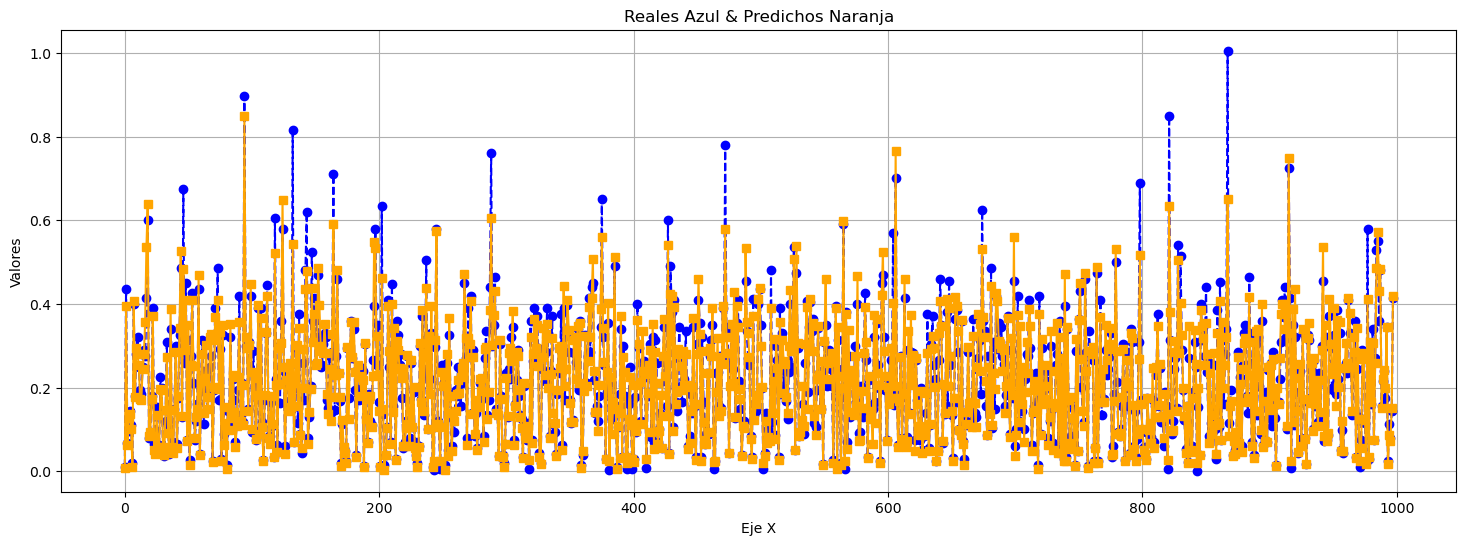

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

archivo = "Dataset_usar_(1).csv"
dataFrame = pd.read_csv(archivo, header = 0 , delimiter = ';')
#dataFrame = pd.read_csv(archivo, delimiter = ';')



dimensiones = dataFrame.shape
filas, columnas = dimensiones

print("------------------------------------------------------")
print("5.2: ")
print("Filas", filas)
print("Columnas", columnas)
print("------------------------------------------------------")

#conformación de A
print("5.2: Matriz A menos la última columna") 
datos = pd.DataFrame(dataFrame).to_numpy()

A = datos[0:datos.shape[0] , 0:7 ]
#b= datos[0:datos.shape[0] , 8]
print(A)
print("b")


print("------------------------------------------------------")
print("5.3.2") 

b_dataFrame=dataFrame.loc[:, "Shellweight"]
b=pd.DataFrame(b_dataFrame).to_numpy()
print(b)

print("Columna9 -> b")

print("Vector b", b)

print("------------------------------------------------------")


print("------------------------------------------------------")
print("5.3.3") 
#First: making the parenthesis first: AtA-1
parenthesisA = np.linalg.inv(np.matmul(np.transpose(A) , A))
#Second: A*()*At*b
x = np.matmul( np.matmul(parenthesisA , np.transpose(A)) , b)
print("------------------------------------------------------")
print("Proyección")
print(x)

print("------------------------------------------------------")

print("------------------------------------------------------")
print("5.3.4") 
b_estimado=np.matmul(A, x)
print("b_estimado = ", b_estimado)


print("------------------------------------------------------")
print("5.3.5")

Difb_b_estimado=b-b_estimado
print("b-b_estimado=" , Difb_b_estimado)
Norma=LA.norm(Difb_b_estimado)
print("Norma(b-b_estimado) = ",  Norma)




print("5.3.6 Graficar")
# Graficar
x = np.arange(len(b)) # making an evenly distribuited array

plt.figure(figsize=(18, 6))
plt.plot(x, b, label='Dataset Reales', color='blue', linestyle='--', marker='o')
plt.plot(x, b_estimado, label='Dataset Predichos', color='orange', linestyle='-', marker='s')
# Add title and labels
plt.title("Reales Azul & Predichos Naranja")
plt.xlabel("Eje X")
plt.ylabel("Valores")

# Show the plot
plt.grid()
plt.show()

